## Introduction to the Proposal

Broad topic:
"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"

Specific Question:
Can played hours and age predict whether a player subscribes to the newsletter in players.csv?

In order to answer this question we will need the variables Age, played_hours to predict the value of subscribe in the players.csv dataset. Because the explanatory variables are quantitative, we will not need to convert them to numeric values for future applications into models. However, we will need to filter out any N/A values for those variables.



In [1]:
# Code that lets me work with tidyverse and other related libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [13]:
# url is a link to a google drive that way you can run the whole thing without needing to download anything (probably)
url <- "https://drive.google.com/uc?rxport-download&id=1rpI9FX3HfPKXI-fv7c5eUrqENtvBP6BU"
players <- read_csv(url)
players


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


## Data Description: players.csv and its potential issues
In the players dataset, there are 196 observations, and 7 variables in total:

##### experience (character) - The players experience (amateur, pro, veteran, regular, beginner)


##### subscribe (logical) - Indicates if player is subscribed to the newsletter by “TRUE” or “FALSE”.
- Issue: We are unable to perform numerical calculations on logical values.


##### hashedEmail (character) - An encoded email address used as anonymous identification for the player
- Issue: There are visibility issues with these encoded email addresses.

##### played_hours (double) - total number of hours the player has spent on the game
- Issue: There are a lot of players who put zero playtime into the game.

##### name (character) - The players display name

##### gender (character) - The players gender (Male, Female, Non-binary, Prefer not to say, Agender, Two-spirited, Other) 
- Issue: Possible missing values, or those who selected Prefer not to say.


##### Age (double) - The players age in years
- Issue: There are potential NA values that should be removed in certain calculations


In [4]:
# summarizing the mean values of the quantitative variables in the players.csv data table
player_mean_values <- players |> summarize(avg_hours_played = mean(played_hours, na.rm = TRUE), avg_age = mean(Age, na.rm = TRUE))
# i put the summarized values in the table below for clarity you're welcome guys :thumbsup:

## Data Description: Summary Statistics for players.csv

|Average Hours Played | Average Age (years)|
|:--------------------|:------------|
|5.85                 |21.14

### Wrangling the players.csv dataset for future analysis/visualization

The file was filtered for any N/A values in the columns Age and played_hours. Then the data was split into training and testing data.

In [8]:
player_data <- players |> filter(!is.na(Age), !is.na(played_hours))

player_split <- initial_split(player_data, prop = 0.75, strata = subscribe)
player_training <- training(player_split)
player_testing <- testing(player_split)


### Visualizations

Below are four different visualizations (using training data):

1) Distribution of Hours Played

We can see that the vast majority of players that registered into the server did not play in it at all. There is no clear distribution of playtime from this graph.

2) Distribution of Ages

The majority of players that registered into the server are around 15-35, with some outliers around the 40s range.


3) Relationship between Age, Played Hours, and Subscription

There is no correlation between age and played hours. Moreover, while there is no correlation between age, played hours, and whether or not one is subscribed, one thing of note is that the spike in hours played at the 15-24 age range consists exclusively of subscribers.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


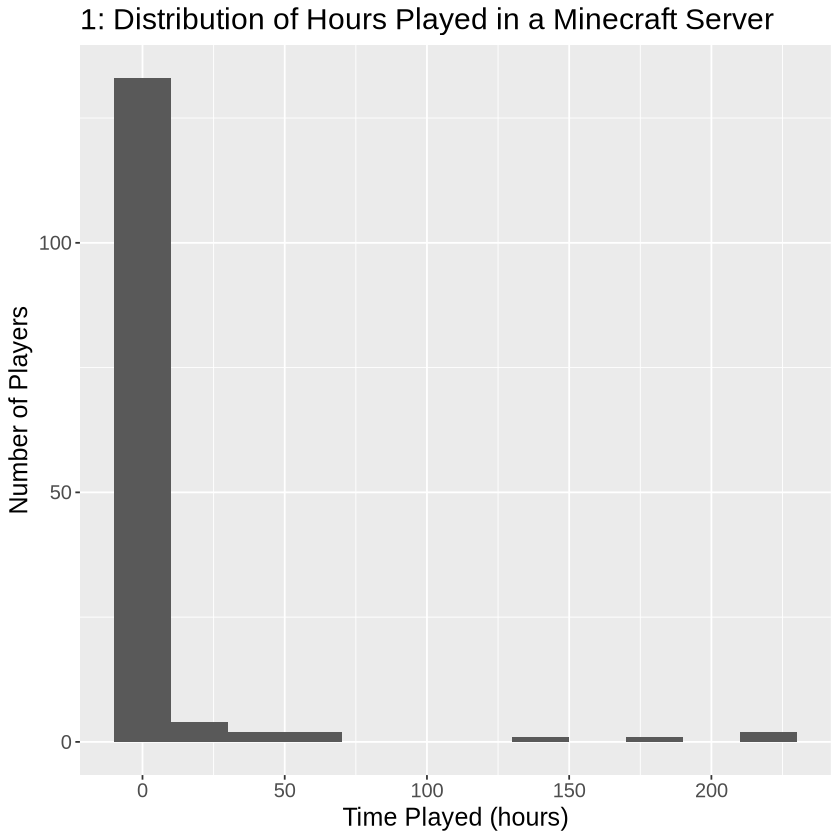

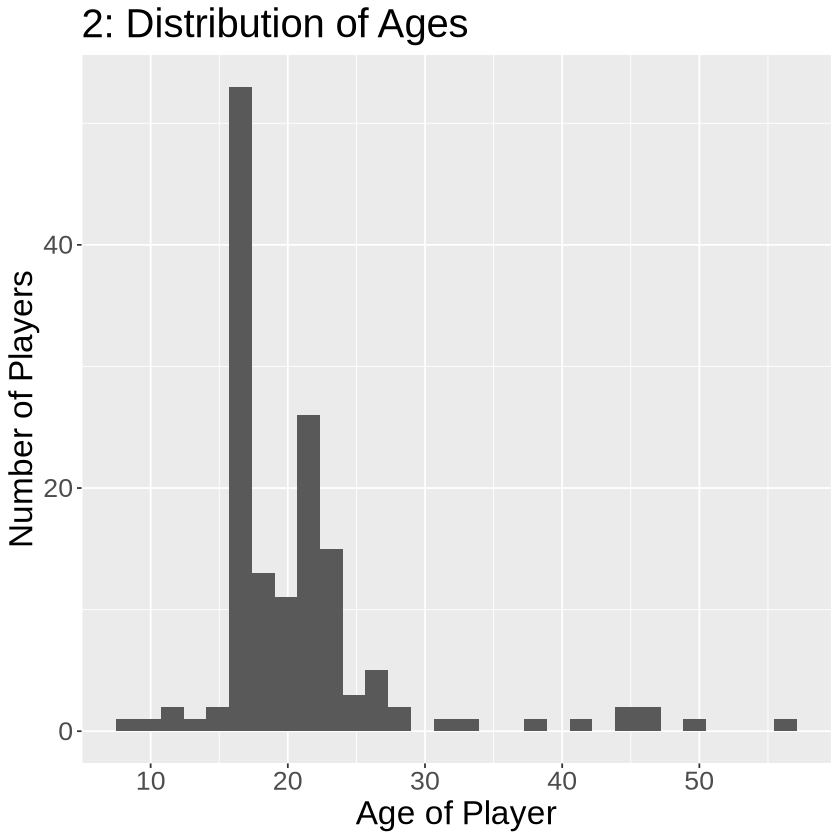

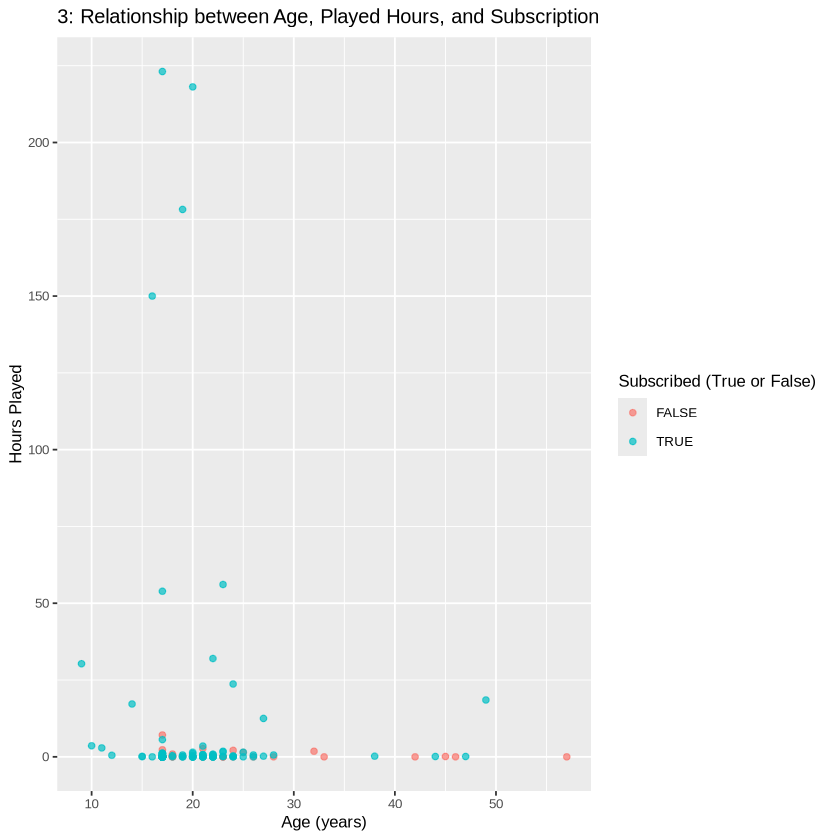

In [9]:
# 1. visualizing the distribution of hours played for all players
hours_played_viz <- player_training |> ggplot(aes(x = played_hours)) + geom_histogram(binwidth = 20) + labs(x = "Time Played (hours)", y = "Number of Players") + 
ggtitle("1: Distribution of Hours Played in a Minecraft Server") + theme(text = element_text(size = 15))

# 2. visualizing the distribution of the age of all players
age_viz <- player_training |> ggplot(aes(x = Age)) + geom_histogram() + labs(x = "Age of Player", y = "Number of Players") + 
ggtitle("2: Distribution of Ages") + theme(text = element_text(size = 20))

# 3. visualizing the relationship between age and played hours
scatterplot_two_explanatory_variables <- player_training |> ggplot(aes(x = Age, y = played_hours, color = subscribe )) + 
geom_point(alpha = 0.7) + labs(x = "Age (years)", y = "Hours Played", color = "Subscribed (True or False)") + 
ggtitle("3: Relationship between Age, Played Hours, and Subscription") + theme(text = element_text(size = 10))



hours_played_viz
age_viz
scatterplot_two_explanatory_variables



## Methods

We will use the knn model and majority vote because the outcome variable is categorical. Furthermore, we will split the data into 75% training data and 25% testing data. In order to effectively utilize the knn model, it is required that we:
1) scale and center the explanatory variables
2) use 5 fold cross-validation to get a more accurate measure of our data's performance
3) Use the accuracy column in the resulting metrics table on the training data to find the best k value for the model

A potential limitation of this model is that the data points have a lot of outliers. Because the knn model is very sensitive to such noise, it might skew the results of the tests.